In [ ]:
!pip install --upgrade pip
!pip install numpy==1.23.5
!pip install scikit-surprise --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 34.7 MB/s  0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> No available output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
ERROR: Failed to build 'numpy' when getting requirements to build wheel
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-linux_x86_64.whl size=2555837 sha256=d92de40bde2d46173d7b7c1e73d9756122d1ea5f66669712

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
!pip install numpy==1.23.5
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the filtered dataset
filtered_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Group Project/netflix_filtered.csv")

# Basic EDA
print("Dataframe shape:", filtered_df.shape)
print("Dataframe info:")
filtered_df.info()
print("\nDescriptive statistics:")
print(filtered_df.describe(include='all'))

# Check for missing values
print("\nMissing values per column:\n", filtered_df.isnull().sum())

# Convert 'date' column to datetime objects
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Extract year, month, and day features
filtered_df['year'] = filtered_df['date'].dt.year
filtered_df['month'] = filtered_df['date'].dt.month
filtered_df['day'] = filtered_df['date'].dt.day

# Explore distributions of ratings
print("\nRating distribution:\n", filtered_df['rating'].value_counts())

  Using cached numpy-1.23.5.tar.gz (10.7 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> No available output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
ERROR: Failed to build 'numpy' when getting requirements to build wheel
Dataframe shape: (4730466, 4)
Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4730466 entries, 0 to 4730465
Data columns (total 4 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   userId   int64 
 1   movieId  int64 
 2   rating   int64 
 3   date     object
dtypes: int64(3), object(1)
memory usage: 144.4+ MB

Descriptive statistics:
              userId       movieId        rating        date
count   4.730466e+06  4.730466e+06  4.730466e+06     4730466
unique           NaN           NaN           NaN        2160
top      

In [ ]:
num_users = filtered_df ['userId'].nunique()
num_movies = filtered_df ['movieId'].nunique()

total_possible_entries = num_users * num_movies

# Actual number of ratings (non-null entries)
num_ratings = filtered_df .shape[0]

# Calculate sparsity
sparsity = 1 - (num_ratings / total_possible_entries)

print(f'Total Users: {num_users}')
print(f'Total Movies: {num_movies}')
print(f'Total Possible Entries (User x Movie): {total_possible_entries}')
print(f'Number of Ratings: {num_ratings}')
print(f'Sparsity of the User-Item Matrix: {sparsity:.4f} or {sparsity * 100:.2f}%')

Total Users: 2331
Total Movies: 6512
Total Possible Entries (User x Movie): 15179472
Number of Ratings: 4730466
Sparsity of the User-Item Matrix: 0.6884 or 68.84%


<ipython-input-5-c7909f3694d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=filtered_df, palette='viridis')


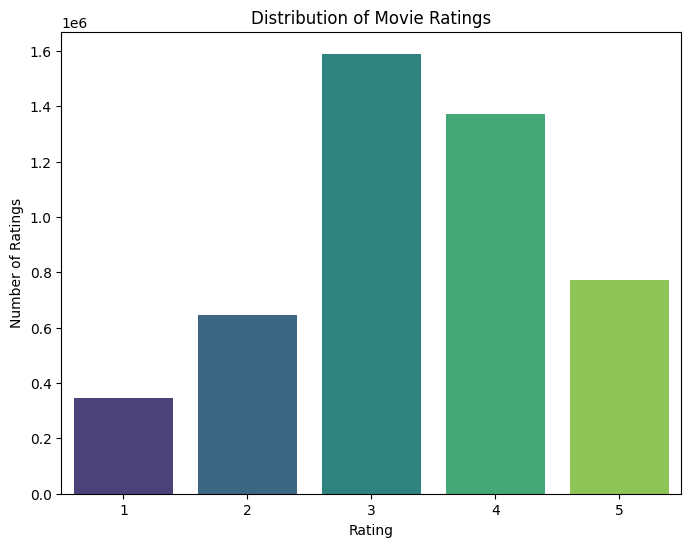

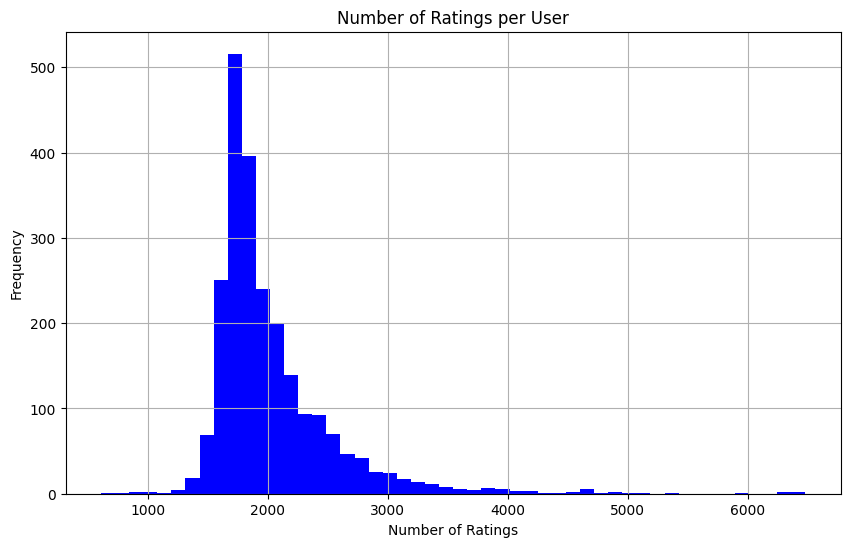

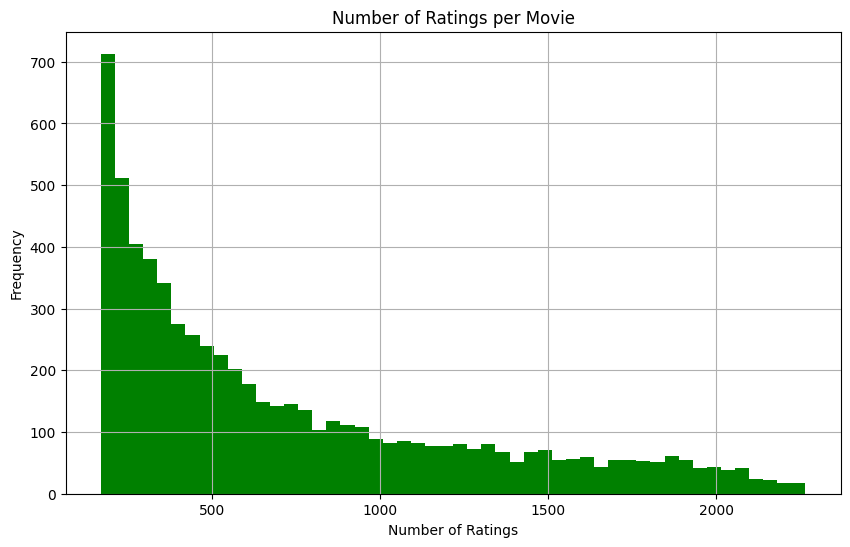

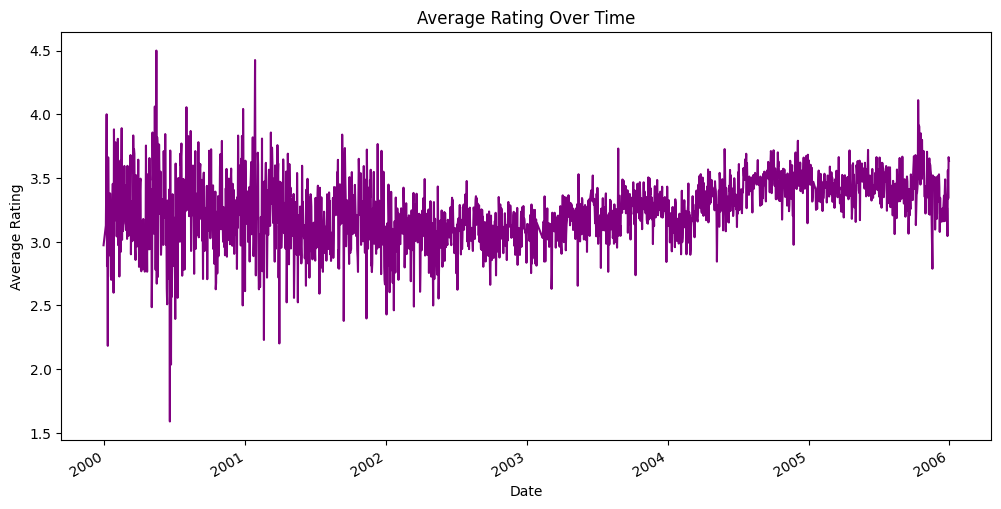

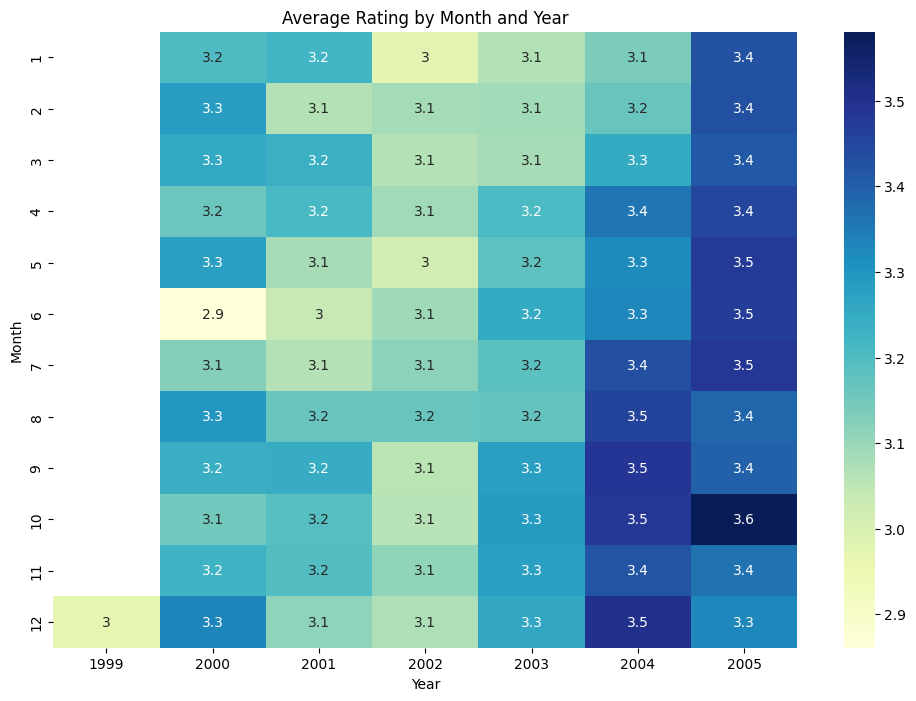

In [ ]:
# Plot: Distribution of Movie Ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=filtered_df, palette='viridis')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

# Plot: Number of Ratings per User
plt.figure(figsize=(10, 6))
filtered_df['userId'].value_counts().hist(bins=50, color='blue')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# Plot: Number of Ratings per Movie
plt.figure(figsize=(10, 6))
filtered_df['movieId'].value_counts().hist(bins=50, color='green')
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# Plot: Average Rating Over Time
plt.figure(figsize=(12, 6))
filtered_df.groupby('date')['rating'].mean().plot(color='purple')
plt.title('Average Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.show()

# Heatmap: Average Rating by Month and Year
average_rating_month_year = filtered_df.groupby(['month', 'year'])['rating'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(average_rating_month_year, annot=True, cmap='YlGnBu')
plt.title('Average Rating by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

In [ ]:
!pip install scikit-surprise --no-cache-dir
import numpy as np
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split
import pandas as pd
import pickle

# Load the dataset
print("Loading Dataset...")
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Group Project/netflix_filtered.csv')

# Define the reader to specify the rating scale
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

# Split into training and testing
trainset, testset = train_test_split(data, test_size=0.2)

print("Training SVD Model...")
# Initialize the SVD model
svd_model = SVD()

# Train the model
svd_model.fit(trainset)

# Evaluate the model
print("Evaluating SVD Model...")
svd_results = cross_validate(svd_model, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Loading Dataset...
Training SVD Model...
Evaluating SVD Model...
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8075  0.8061  0.8068  0.8068  0.0006  
MAE (testset)     0.6225  0.6219  0.6224  0.6223  0.0003  
Fit time          109.70  105.96  104.62  106.76  2.15    
Test time         39.97   26.26   44.49   36.91   7.75    


In [ ]:
from google.colab import userdata
import os
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

TimeoutException: Requesting secret OPENAI_API_KEY timed out. Secrets can only be fetched when running from the Colab UI.

In [ ]:
from openai import OpenAI
import os

# If API key is already in the environment variable, it will be read from OPENAI_API_KEY automatically
client = OpenAI()

response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": "Hello!"}]
)
print(response.choices[0].message.content)

In [ ]:
from typing import List, Dict, Tuple, Any
from __future__ import annotations

import textwrap
from typing import List, Tuple

from openai import OpenAI

# Function to generate explanation using OpenAI GPT
def generate_explanation(
    client: OpenAI,
    movie_title: str,
    predicted_rating: float,
    user_ratings: List[Tuple[str, float]],
    *,
    model="gpt-3.5-turbo",
    max_movies=8,
    temperature=0.7,
) -> str:
    """
    Produce a concise narrative that explains why *movie_title* was recommended as a friend .

    Parameters
    ----------
    client : OpenAI
        Authenticated OpenAI client instance.
    movie_title : str
        Title of the recommended movie.
    predicted_rating : float
        Model-predicted rating on a 0-5 scale.
    user_ratings : List[(str, float)]
        Historical (title, rating) pairs for the current user.
    model : str, optional
        OpenAI model to invoke. Defaults to "gpt-3.5-turbo".
    max_movies : int, optional
        Cap on user-rated movies injected into the prompt (controls token cost).
    temperature : float, optional
        Sampling temperature for the completion call.

    Returns
    -------
    str
        Human-readable explanation, or an error string.
    """
    if client is None:
        raise ValueError("OpenAI client not initialized.")

    # Trim the number of user-rated movies to reduce token usage
    trimmed_ratings = user_ratings[:max_movies]
    ratings_text = "\n".join(
        f"- {title}: {rating}/5★" for title, rating in trimmed_ratings if title and rating > 0
    )

    # Construct the prompt for the AI
    prompt = textwrap.dedent(f"""
        As a recommendation engine, justify why “{movie_title}”
        (predicted {predicted_rating:.2f}/5) suits the user.
        Highlight genre alignment, thematic overlap, and any cast/crew commonalities. Respond in 3–4 sentences.

        User's past ratings:
        {ratings_text}
    """).strip()

    try:
        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "system", "content": "You are a concise movie-recommendation explainer friend."},
                {"role": "user", "content": prompt},
            ],
            max_tokens=180,
            temperature=temperature,
        )
        return response.choices[0].message.content.strip()
    except Exception as exc:
        return f"Explanation unavailable: {exc}"

# Function to explain a specific movie recommendation
def explain_recommendation(
    client: Any,
    selected_movie: str,
    user_ratings: List[Tuple[str, float]],
    movie_details: List[Dict[str, Any]],
) -> str:
    """
    Generate a natural language explanation for a recommended movie.

    Parameters
    ----------
    client : OpenAI
        Authenticated OpenAI client instance.
    selected_movie : str
        Title of the recommended movie.
    user_ratings : list
        List of (movie_title, rating) tuples for the user.
    movie_details : list
        List of dictionaries containing movie metadata.

    Returns
    -------
    str
        Explanation text generated by the model.
    """
    if client is None:
        raise ValueError("OpenAI client not initialized.")
    if not selected_movie or not user_ratings or not movie_details:
        return "Insufficient data to generate explanation."

    # Find the selected movie in the movie details list
    film = next((m for m in movie_details if m["title"] == selected_movie), None)
    if not film:
        return f"Movie '{selected_movie}' not found in recommendations."

    # Call the explanation generator
    return generate_explanation(
        client, film["title"], film.get("predicted_rating", 0), user_ratings
    )

In [ ]:
!pip install gradio

In [ ]:
# ──────────────────────────────────────────────────────────────────────────
#  Movie‑Recommender · Gradio · GPT Explanation · Poster Support
#  > one‑file deployable
# ──────────────────────────────────────────────────────────────────────────
import os, textwrap, requests
from random import shuffle
from typing import List, Tuple

import pandas as pd
import gradio as gr
import joblib
from openai import OpenAI

# ========== CONFIG & DATA =================================================
client = OpenAI()                                              # GPT access
TMDB_API_KEY    = os.getenv("TMDB_API_KEY", "")
TMDB_SEARCH_URL = "https://api.themoviedb.org/3/search/movie"
TMDB_IMG_BASE   = "https://image.tmdb.org/t/p/w200"
poster_cache: dict[str, str | None] = {}

# --- Load metadata --------------------------------------------------------
movies = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Group Project/Data/movie_titles.csv",
    header=None, names=["movieId", "year", "title"],
    encoding="latin1", engine="python", on_bad_lines="skip"
)
ratings = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Group Project/netflix_filtered.csv",
    encoding="latin1", engine="python", on_bad_lines="skip"
)

# --- Top‑N by popularity (fallback pool) ----------------------------------
pop_stats = (
    ratings.groupby("movieId")["rating"]
    .agg(["count", "mean"])
    .reset_index()
    .merge(movies, on="movieId")
    .sort_values(["count", "mean"], ascending=[False, False])
)
top_movies: list[str] = pop_stats["title"].tolist()

# --- Poster fetch with basic caching -------------------------------------
def fetch_poster_url(title: str) -> str | None:
    if title in poster_cache:
        return poster_cache[title]
    try:
        r = requests.get(TMDB_SEARCH_URL,
                         params={"api_key": TMDB_API_KEY, "query": title},
                         timeout=5)
        first = (r.json().get("results") or [{}])[0]
        path  = first.get("poster_path")
        url   = f"{TMDB_IMG_BASE}{path}" if path else None
    except Exception:
        url = None
    poster_cache[title] = url
    return url

# --- Gallery thumbnails for rating stage ---------------------------------
gallery_items: list[Tuple[str, str]] = []
for title in top_movies:
    url = fetch_poster_url(title)
    if url:
        gallery_items.append((url, title))
    if len(gallery_items) >= 50:
        break

# ========== BUSINESS LOGIC ===============================================
def recommend_movies(user_ratings: List[Tuple[str, float]],
                     n: int = 5) -> List[str]:
    rated_titles = {t for t, _ in user_ratings}
    candidates   = [m for m in top_movies if m not in rated_titles]
    shuffle(candidates)
    return candidates[:n]

def gpt_explain(movie_title: str,
                predicted_rating: float,
                user_ratings: List[Tuple[str, float]]) -> str:
    ratings_txt = "\n".join(f"- {t}: {r}★" for t, r in user_ratings)
    prompt = textwrap.dedent(f"""
        Justify recommending “{movie_title}” (predicted {predicted_rating:.2f}/5):
        Link genres, themes, cast, or directors in ≤4 sentences.
        User ratings:
        {ratings_txt}
    """).strip()
    rsp = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system",
             "content": "You are a concise movie‑recommendation explainer."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=180,
        temperature=0.7
    )
    return rsp.choices[0].message.content.strip()

# ========== GRADIO UI =====================================================
with gr.Blocks() as demo:
    gr.Markdown("### 🎬 Rate Movies by Clicking Posters")

    gallery = gr.Gallery(
        value=[u for u, _ in gallery_items],
        columns=5, interactive=True
    )

    selected_tb  = gr.Textbox(label="Selected Movie", interactive=False)
    rating_sl    = gr.Slider(0, 5, step=0.5, label="Your Rating",
                              visible=False)
    ratings_st   = gr.State([])   # [(title, rating), …]
    ratings_md   = gr.Markdown("**Your Ratings:**\n_No ratings yet._")

    rec_btn      = gr.Button("🍿 Get Recommendations", variant="primary")
    rec_md       = gr.Markdown()
    rec_dd       = gr.Dropdown(label="Pick a Recommended Movie",
                               choices=[])
    rec_gallery  = gr.Gallery(label="Recommended Posters", columns=5)
    explain_btn  = gr.Button("💬 Why this movie?")
    explain_tb   = gr.Textbox(label="AI Explanation", lines=4)

    # -- 1. gallery → reveal slider ---------------------------------------
    def _on_gallery(evt: gr.SelectData):
        title = gallery_items[evt.index][1]
        return title, gr.update(visible=True, value=2.5)
    gallery.select(_on_gallery, outputs=[selected_tb, rating_sl])

    # -- 2. slider → store rating -----------------------------------------
    def _on_rate(title, val, current):
        up = [x for x in current if x[0] != title] + [(title, val)]
        md = "\n".join(f"- **{t}**: {r}★" for t, r in up)
        return up, f"**Your Ratings:**\n{md}"
    rating_sl.change(_on_rate,
                     inputs=[selected_tb, rating_sl, ratings_st],
                     outputs=[ratings_st, ratings_md])

    # -- 3. recommend ------------------------------------------------------
    def _on_rec(ratings_state):
        recs = recommend_movies(ratings_state)
        dd   = gr.update(choices=recs, value=recs[0] if recs else None)
        md   = "**Recommended for You:**\n" + "\n".join(f"- {r}" for r in recs)
        posters = [p for p in (fetch_poster_url(t) for t in recs) if p]
        return md, dd, posters
    rec_btn.click(_on_rec,
                  inputs=ratings_st,
                  outputs=[rec_md, rec_dd, rec_gallery])

    # -- 4. explanation ----------------------------------------------------
    def _on_explain(title, ratings_state):
        if not title:
            return "Select a movie first."
        # placeholder predicted rating; swap in SVD scoring if desired
        return gpt_explain(title, 4.0, ratings_state)
    explain_btn.click(_on_explain,
                      inputs=[rec_dd, ratings_st],
                      outputs=explain_tb)

demo.launch(share=True)